<a href="https://colab.research.google.com/github/maherelhachem/INSE6220/blob/main/new%20column__Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [6]:
from google.colab import files
uploaded = files.upload()

Saving column_3C.csv to column_3C.csv


In [7]:
!pip install -q xlrd
import pandas as pd
df = pd.read_csv('column_3C.csv')
df

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
234         48.902904     5.587589              55.500000     43.315316   
235         46.236399    10.062770              37.000000     36.173629   
236         46.426366     6.620795              48.100000     39.805571   
237         39.656902    16.208839              36.674857     23.448063   
238         45.575482    18.759135              33.774143     26.816347   

     pelvic_radius  degree_spondylolisthesis   class  
0        98.672917                 -0.254400  Hernia  
1       114.405425                  4.564259  Hernia  
2       105.985135                 -3.530317  Hernia  
3       101.868495                 11.211523  Hernia  
4       108.168725                  7.918501  Hernia  
..             ...                       ...     ...  
234     137.108289                 19.854759  Normal  
235     128.063620                 -5.100053  Normal  
236     130.350096                  2.449382  Normal  
237     131.922009                 -4.968980  Normal  
238     116.797007                  3.131910  Normal  

[239 rows x 7 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          239 non-null    float64
 1   pelvic_tilt               239 non-null    float64
 2   lumbar_lordosis_angle     239 non-null    float64
 3   sacral_slope              239 non-null    float64
 4   pelvic_radius             239 non-null    float64
 5   degree_spondylolisthesis  239 non-null    float64
 6   class                     239 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.2+ KB


In [9]:
# to change class column into unique values 
df ['class'].unique()
# to count the class variables 
df ['class'][df['class']=='Hernia'].value_counts()
df ['class'][df ['class']=='Spondylolisthesis'].value_counts()
df ['class'][df ['class']=='Normal'].value_counts()

labels, levels = pd.factorize(df['class'])
df['class']= labels

In [10]:
# to convert string to numeric     


for i in range(0, len(df.columns)):
	df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')   

In [11]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [12]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

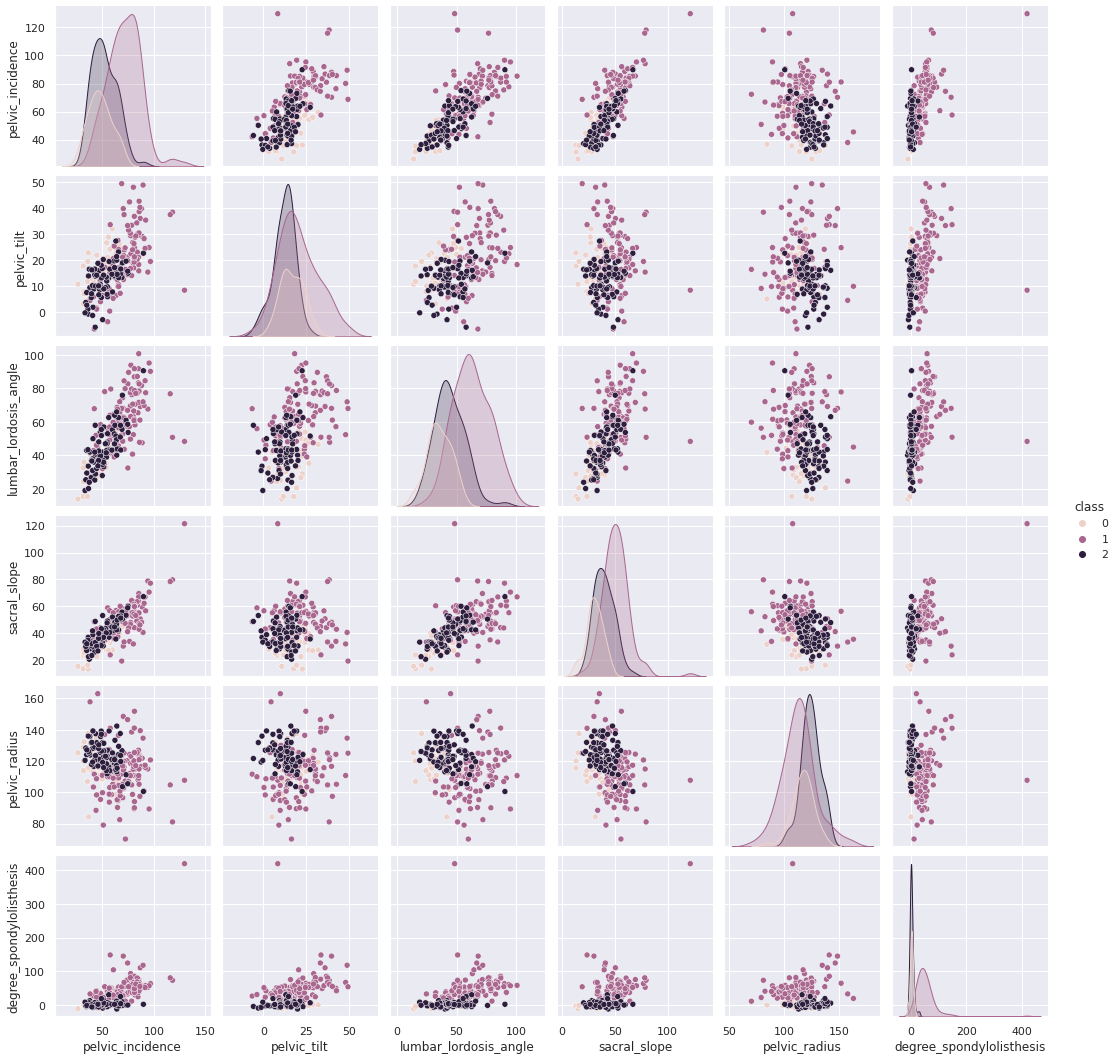

In [13]:
sns.pairplot(df, hue='class')
plt.show()

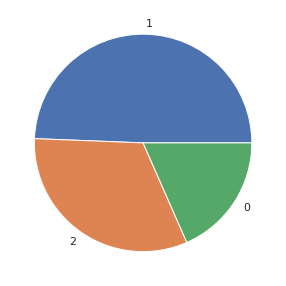

In [14]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [15]:
X = df.drop(columns=['class'])
X.head(10)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   
5         40.250200    13.921907              25.124950     26.328293   
6         53.432928    15.864336              37.165934     37.568592   
7         45.366754    10.755611              29.038349     34.611142   
8         43.790190    13.533753              42.690814     30.256437   
9         36.686353     5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  
5     130.327871                  2.230652  
6     120.567523                  5.988551  
7     117.270067                -10.675871  
8     125.002893                 13.289018  
9      84.241415                  0.664437

In [16]:
X.describe().transpose()

count        mean        std        min         25%  \
pelvic_incidence          239.0   60.685354  17.456338  26.147921   46.434222   
pelvic_tilt               239.0   16.998127  10.015431  -6.554948   10.145246   
lumbar_lordosis_angle     239.0   51.776515  17.800131  14.000000   39.048434   
sacral_slope              239.0   43.687228  13.437254  13.366931   33.881693   
pelvic_radius             239.0  117.302058  13.625162  70.082575  109.946706   
degree_spondylolisthesis  239.0   27.080894  38.961610 -11.058179    1.880354   

                                 50%         75%         max  
pelvic_incidence           59.595540   71.620423  129.834041  
pelvic_tilt                15.380770   21.524863   49.431864  
lumbar_lordosis_angle      50.000000   62.929554  100.744220  
sacral_slope               42.997467   52.401308  121.429566  
pelvic_radius             117.818760  125.091375  163.071041  
degree_spondylolisthesis   13.928331   42.709278  418.543082

**Standardize the Data**

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.134471     0.555754              -0.684991     -0.239538   
1         -1.241600    -0.694098              -1.506579     -1.095618   
2          0.467668     0.522325              -0.094823      0.218233   
3          0.494361     0.765900              -0.420275      0.071362   
4         -0.629887    -0.735013              -1.320684     -0.270446   
5         -1.173101    -0.307793              -1.500410     -1.294563   
6         -0.416333    -0.113442              -0.822536     -0.456304   
7         -0.879380    -0.624598              -1.280096     -0.676860   
8         -0.969884    -0.346630              -0.511500     -1.001617   
9         -1.377687    -1.199389              -0.553276     -0.895791   

   pelvic_radius  degree_spondylolisthesis  
0      -1.370130                 -0.703068  
1      -0.213041                 -0.579131  
2      -0.832333                 -0.787325  
3      -1.135102                 -0.408163  
4      -0.671735                 -0.492860  
5       0.958018                 -0.639152  
6       0.240167                 -0.542498  
7      -0.002353                 -0.971110  
8       0.566378                 -0.354729  
9      -2.431533                 -0.679435

In [18]:
X.describe().transpose()

count          mean       std       min       25%  \
pelvic_incidence          239.0  1.560816e-16  1.002099 -1.982656 -0.818101   
pelvic_tilt               239.0 -4.656898e-17  1.002099 -2.356614 -0.685668   
lumbar_lordosis_angle     239.0  6.689210e-17  1.002099 -2.126714 -0.716556   
sacral_slope              239.0 -3.874167e-16  1.002099 -2.261171 -0.731259   
pelvic_radius             239.0 -2.035506e-16  1.002099 -3.472882 -0.540969   
degree_spondylolisthesis  239.0 -1.282099e-16  1.002099 -0.980943 -0.648162   

                               50%       75%        max  
pelvic_incidence         -0.062562  0.627739   3.969550  
pelvic_tilt              -0.161825  0.452925   3.245173  
lumbar_lordosis_angle    -0.100013  0.627886   2.756748  
sacral_slope             -0.051440  0.649863   5.797724  
pelvic_radius             0.038002  0.572886   3.366201  
degree_spondylolisthesis -0.338286  0.401964  10.068468

**Observations and variables**

In [19]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

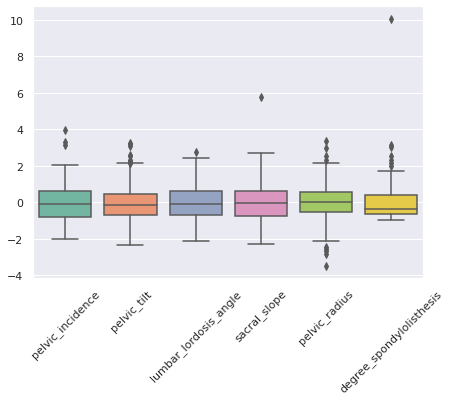

In [20]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

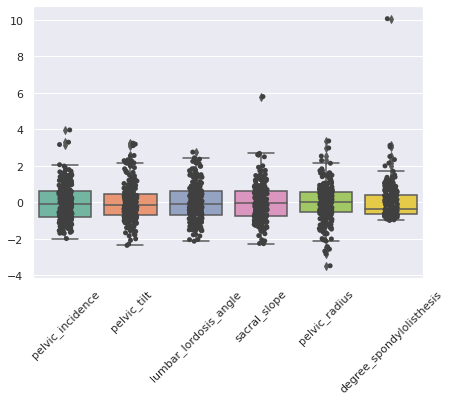

In [21]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

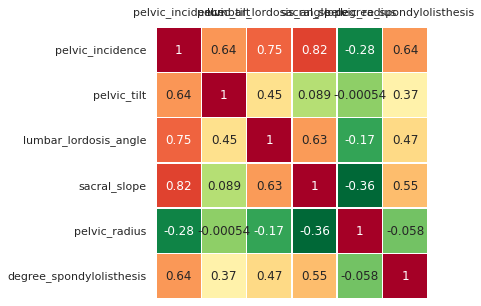

In [22]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

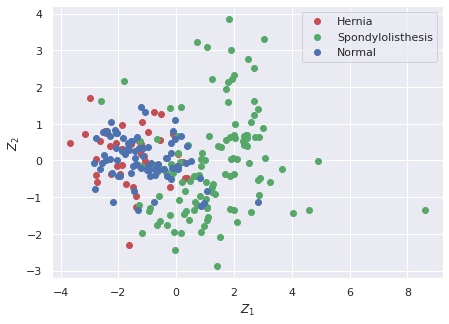

In [23]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Hernia = np.where(y == 0)
idx_Spondylolisthesis = np.where(y == 1)
idx_Normal = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Hernia,0], Z[idx_Hernia,1], c='r', label='Hernia')
plt.scatter(Z[idx_Spondylolisthesis,0], Z[idx_Spondylolisthesis,1], c='g', label='Spondylolisthesis')
plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='b', label='Normal')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

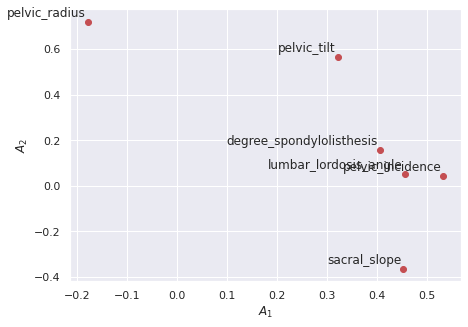

In [24]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


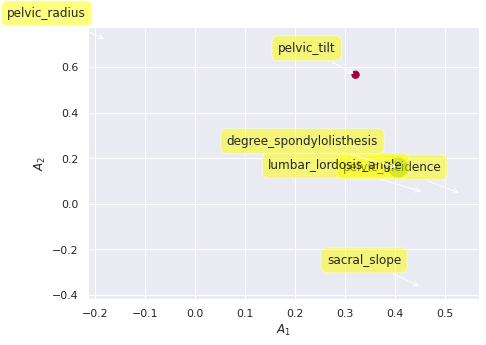

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

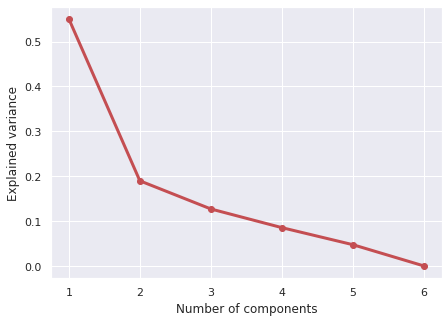

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

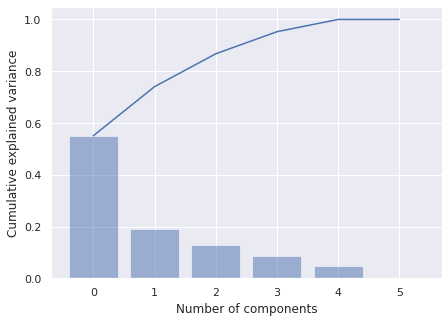

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

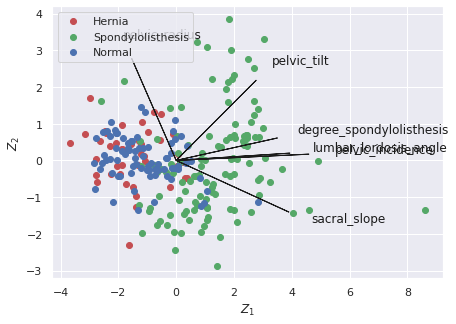

In [28]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Hernia,0], Z[idx_Hernia,1], c='r', label='Hernia')
plt.scatter(Z[idx_Spondylolisthesis,0], Z[idx_Spondylolisthesis,1], c='g', label='Spondylolisthesis')
plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='b', label='Normal')
plt.legend(loc='upper left')

##**Using PCA Library**

In [30]:
!pip install pca

In [31]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [32]:
out['PC']

PC1       PC2       PC3       PC4
0   -0.212617 -0.724523 -1.516289  0.369254
1   -2.268467 -0.371102 -0.273148  0.718003
2    0.301219 -0.491638 -1.063156 -0.289732
3    0.386916 -0.473535 -1.296914  0.310809
4   -1.379272 -0.974502 -0.214938  0.625106
..        ...       ...       ...       ...
234 -0.980676  0.363253  1.501302 -0.737892
235 -1.778225  0.170060  0.389406 -0.252351
236 -1.425759  0.060893  0.880682 -0.613786
237 -2.269757  1.050769 -0.141667 -0.081076
238 -1.683663  0.343176 -0.791366  0.441593

[239 rows x 4 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa7a31e3410>)

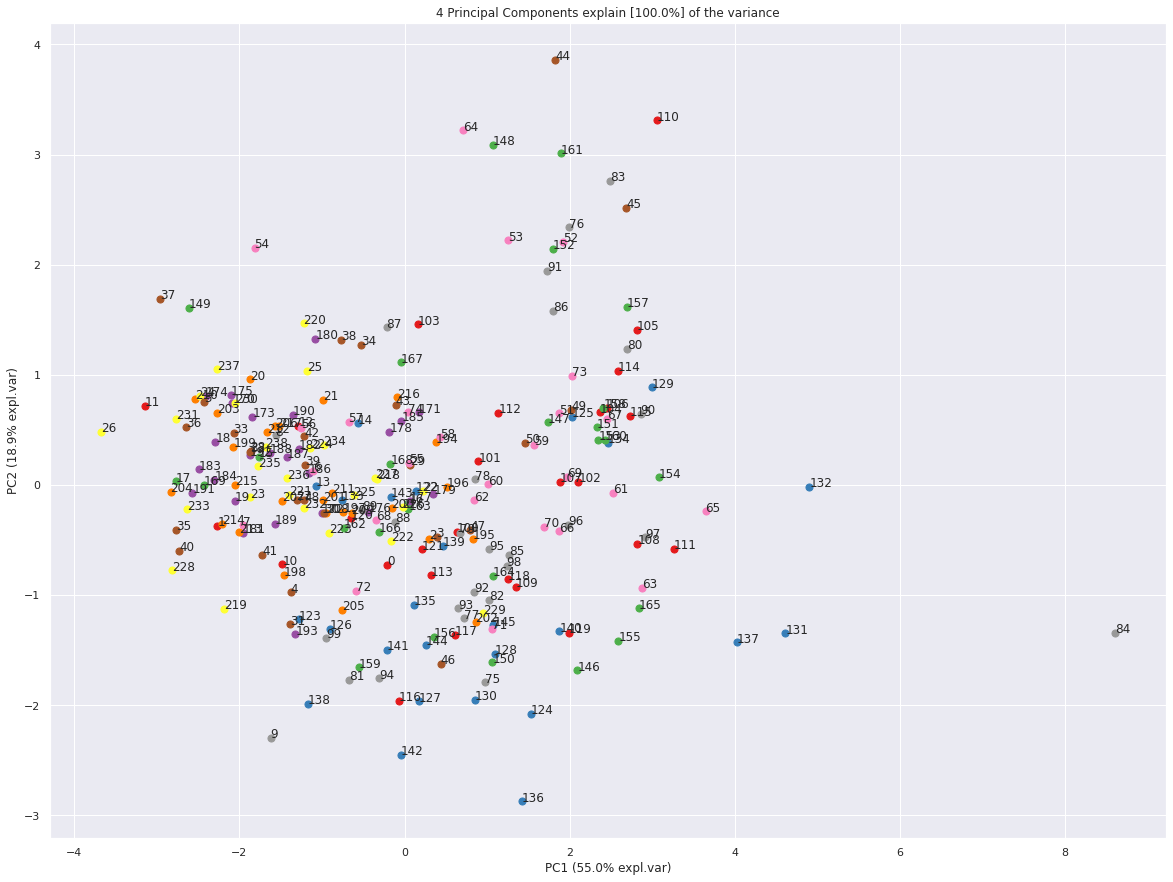

In [33]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [34]:
A = out['loadings'].T

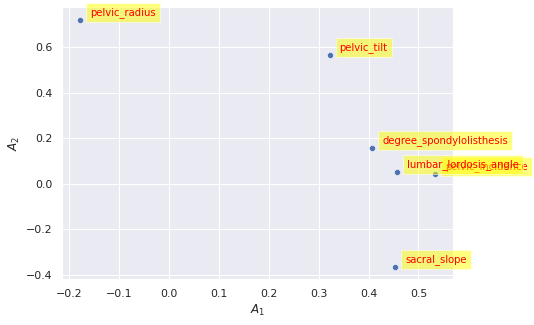

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

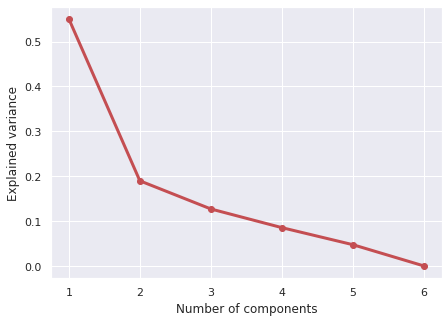

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

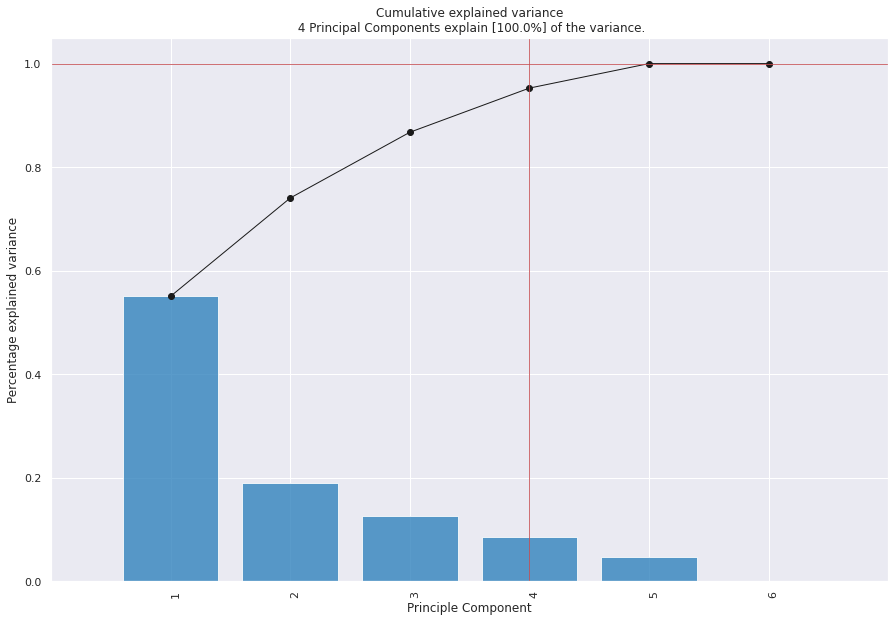

<Figure size 504x360 with 0 Axes>

In [37]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


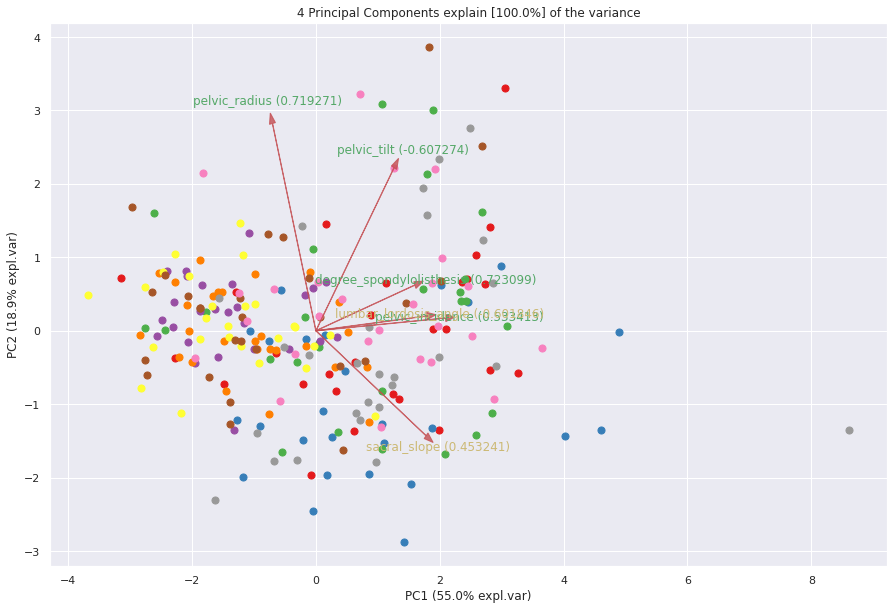

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa79ec302d0>)

In [38]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


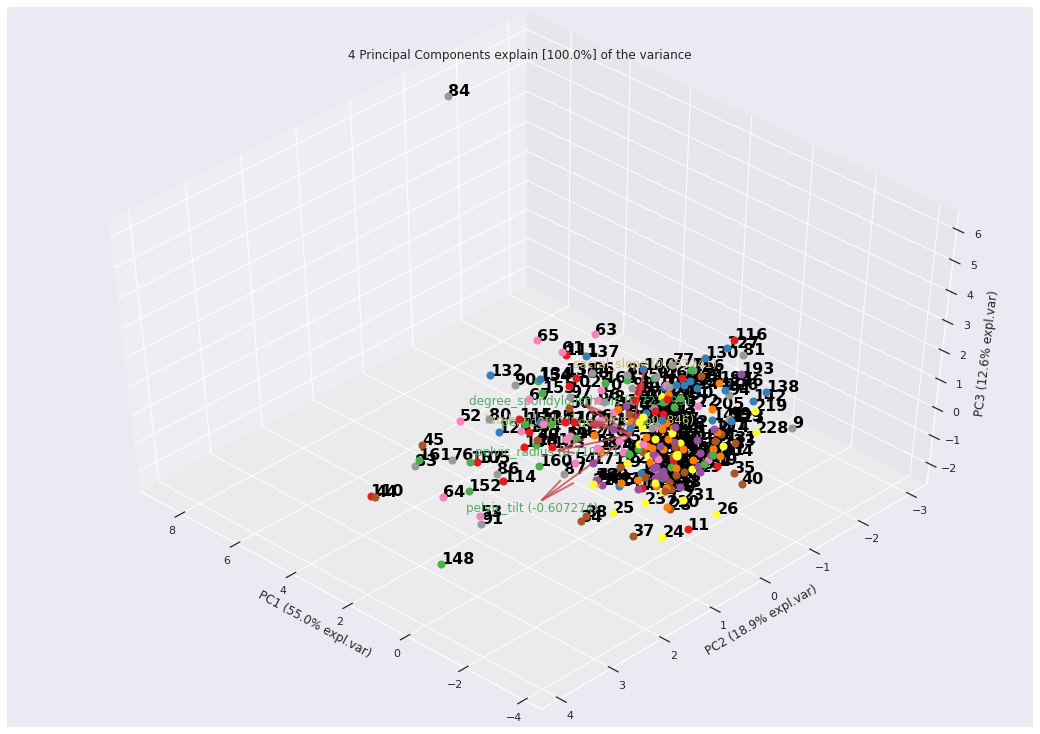

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fa7a0ebcfd0>)

In [39]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [40]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (215, 7)
Unseen Data For Predictions: (24, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [42]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (215, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (150, 6)
12                    Transformed Test Set           (65, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2614
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [43]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.8867  0.9743  0.8710  0.9087   
lr                    Logistic Regression    0.8733  0.9749  0.8430  0.8915   
et                 Extra Trees Classifier    0.8533  0.9509  0.8122  0.8663   
knn                K Neighbors Classifier    0.8467  0.9527  0.8055  0.8604   
rf               Random Forest Classifier    0.8400  0.9593  0.7855  0.8564   
lightgbm  Light Gradient Boosting Machine    0.8333  0.9465  0.7879  0.8504   
ridge                    Ridge Classifier    0.8267  0.0000  0.7804  0.8509   
lda          Linear Discriminant Analysis    0.8267  0.9369  0.8089  0.8596   
nb                            Naive Bayes    0.8200  0.9555  0.7769  0.8278   
dt               Decision Tree Classifier    0.8067  0.8614  0.7696  0.8224   
svm                   SVM - Linear Kernel    0.8000  0.0000  0.7252  0.7752   
gbc          Gradient Boosting Classifier    0.7933  0.9448  0.7299  0.8114   
ada                  Ada Boost Classifier    0.6200  0.8375  0.6174  0.6815   
dummy                    Dummy Classifier    0.4867  0.5000  0.3333  0.2378   

              F1   Kappa     MCC  TT (Sec)  
qda       0.8810  0.8187  0.8313     0.017  
lr        0.8742  0.7976  0.8051     0.446  
et        0.8471  0.7643  0.7740     0.469  
knn       0.8446  0.7553  0.7629     0.114  
rf        0.8358  0.7422  0.7515     0.482  
lightgbm  0.8338  0.7315  0.7381     0.083  
ridge     0.8162  0.7171  0.7314     0.014  
lda       0.8275  0.7282  0.7410     0.017  
nb        0.8182  0.7112  0.7163     0.017  
dt        0.8062  0.6914  0.6990     0.017  
svm       0.7716  0.6734  0.6983     0.064  
gbc       0.7872  0.6672  0.6790     0.267  
ada       0.5978  0.4190  0.4623     0.111  
dummy     0.3192  0.0000  0.0000     0.017

In [44]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [45]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8667  0.8958  0.8667  0.8917  0.8570  0.7887  0.8059
1       0.6000  0.6958  0.6127  0.6495  0.6111  0.3836  0.3944
2       0.8000  0.8667  0.7556  0.8167  0.8032  0.6875  0.6923
3       0.8000  0.8667  0.7556  0.8167  0.8032  0.6875  0.6923
4       0.8667  0.9083  0.8413  0.8778  0.8671  0.7917  0.7972
5       0.8000  0.8458  0.7556  0.7917  0.7911  0.6786  0.6836
6       0.8000  0.8583  0.7111  0.7889  0.7891  0.6786  0.6836
7       0.8000  0.8401  0.7000  0.7907  0.7908  0.6512  0.6566
8       0.8667  0.9231  0.8917  0.9333  0.8830  0.7872  0.8051
9       0.8667  0.9129  0.8056  0.8667  0.8667  0.7794  0.7794
Mean    0.8067  0.8614  0.7696  0.8224  0.8062  0.6914  0.6990
SD      0.0757  0.0617  0.0801  0.0743  0.0739  0.1154  0.1157

In [46]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [47]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8667  0.9206  0.8222  0.8750  0.8622  0.7826  0.7888
1       0.8000  0.9211  0.7111  0.7889  0.7891  0.6786  0.6836
2       0.8667  0.9500  0.7778  0.9048  0.8444  0.7826  0.8074
3       0.9333  0.9522  0.9333  0.9500  0.9344  0.8958  0.9021
4       0.8000  0.8550  0.7746  0.8222  0.8065  0.6875  0.6923
5       0.8000  0.8278  0.7111  0.8306  0.7780  0.6691  0.6858
6       0.9333  0.9906  0.9333  0.9500  0.9344  0.8958  0.9021
7       0.8667  0.8786  0.7667  0.8741  0.8575  0.7619  0.7692
8       0.8000  0.9024  0.8250  0.9200  0.8240  0.6875  0.7231
9       0.7333  0.8288  0.5833  0.6667  0.6933  0.5522  0.5698
Mean    0.8400  0.9027  0.7838  0.8582  0.8324  0.7394  0.7524
SD      0.0611  0.0520  0.0995  0.0818  0.0688  0.1011  0.0982

In [48]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [50]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [51]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [52]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9411  0.7556  0.7917  0.7911  0.6786  0.6836
1       0.8667  0.9694  0.8222  0.8667  0.8667  0.7887  0.7887
2       0.9333  0.9939  0.8889  0.9444  0.9297  0.8929  0.8995
3       0.7333  0.9200  0.6889  0.7689  0.7333  0.5890  0.6056
4       0.8000  0.9356  0.7556  0.8167  0.8032  0.6875  0.6923
5       0.8667  0.9200  0.8857  0.8833  0.8677  0.7917  0.7972
6       0.7333  0.9403  0.6444  0.7083  0.7156  0.5652  0.5697
7       0.9333  0.9731  0.8333  0.9444  0.9253  0.8837  0.8911
8       0.8667  0.9332  0.8917  0.9333  0.8830  0.7872  0.8051
9       0.9333  1.0000  0.8889  0.9467  0.9304  0.8889  0.8956
Mean    0.8467  0.9527  0.8055  0.8604  0.8446  0.7553  0.7629
SD      0.0733  0.0278  0.0856  0.0810  0.0756  0.1144  0.1139

**Tune K Neighbors Model**

In [53]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.9283  0.5333  0.5750  0.6174  0.4485  0.4597
1       0.8667  1.0000  0.7778  0.9048  0.8444  0.7826  0.8074
2       0.9333  0.9817  0.8889  0.9444  0.9297  0.8929  0.8995
3       0.9333  0.9811  0.8889  0.9444  0.9297  0.8929  0.8995
4       0.9333  0.9694  0.8889  0.9444  0.9297  0.8929  0.8995
5       0.8000  0.9464  0.7746  0.8000  0.8000  0.6831  0.6831
6       0.8000  0.9144  0.7111  0.8306  0.7780  0.6691  0.6858
7       0.9333  0.9882  0.8333  0.9444  0.9253  0.8837  0.8911
8       0.8667  0.9368  0.8917  0.9333  0.8830  0.7872  0.8051
9       0.8000  1.0000  0.7361  0.8857  0.7917  0.6739  0.7104
Mean    0.8533  0.9646  0.7925  0.8707  0.8429  0.7607  0.7741
SD      0.0833  0.0293  0.1081  0.1101  0.0951  0.1372  0.1349

**Evaluate K Neighbors Model**

In [54]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [55]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7333  0.9189  0.7079  0.7333  0.7333  0.5775  0.5775
1       0.9333  0.9933  0.9333  0.9500  0.9344  0.8958  0.9021
2       0.9333  1.0000  0.9333  0.9500  0.9344  0.8958  0.9021
3       0.8000  0.9756  0.7556  0.8167  0.8032  0.6875  0.6923
4       0.8667  0.9644  0.8413  0.8778  0.8671  0.7917  0.7972
5       0.8667  0.9661  0.8222  0.8963  0.8646  0.7794  0.7988
6       0.8667  0.9567  0.8222  0.8667  0.8667  0.7887  0.7887
7       0.9333  1.0000  0.8333  0.9444  0.9253  0.8837  0.8911
8       0.8667  0.9736  0.8917  0.9333  0.8830  0.7872  0.8051
9       0.9333  1.0000  0.8889  0.9467  0.9304  0.8889  0.8956
Mean    0.8733  0.9749  0.8430  0.8915  0.8742  0.7976  0.8051
SD      0.0629  0.0243  0.0690  0.0677  0.0618  0.0981  0.0997

**Tune Logistic Regression Model**

In [56]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9189  0.7556  0.7917  0.7911  0.6786  0.6836
1       0.9333  0.9933  0.9333  0.9500  0.9344  0.8958  0.9021
2       0.9333  1.0000  0.9333  0.9500  0.9344  0.8958  0.9021
3       0.8000  0.9756  0.7556  0.8167  0.8032  0.6875  0.6923
4       0.8667  0.9700  0.8413  0.8778  0.8671  0.7917  0.7972
5       0.9333  0.9717  0.9333  0.9417  0.9319  0.8929  0.8995
6       0.8667  0.9567  0.8222  0.8667  0.8667  0.7887  0.7887
7       0.9333  1.0000  0.8333  0.9444  0.9253  0.8837  0.8911
8       0.8667  0.9736  0.8917  0.9333  0.8830  0.7872  0.8051
9       0.9333  1.0000  0.8889  0.9467  0.9304  0.8889  0.8956
Mean    0.8867  0.9760  0.8588  0.9019  0.8867  0.8191  0.8257
SD      0.0521  0.0239  0.0650  0.0568  0.0519  0.0813  0.0818

**Evaluate Logistic Regression Model**

In [57]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [58]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8667  0.9161  0.8222  0.8750  0.8622  0.7826  0.7888
1       0.9333  0.9878  0.9333  0.9500  0.9344  0.8958  0.9021
2       0.8667  1.0000  0.7778  0.9048  0.8444  0.7826  0.8074
3       0.8000  0.9689  0.7556  0.8167  0.8032  0.6875  0.6923
4       0.6000  0.9133  0.4857  0.6095  0.5974  0.3662  0.3742
5       0.8667  0.9208  0.8222  0.8750  0.8622  0.7826  0.7888
6       0.7333  0.9339  0.6444  0.7083  0.7156  0.5652  0.5697
7       0.9333  0.9933  0.8333  0.9444  0.9253  0.8837  0.8911
8       0.8667  0.9593  0.8917  0.9333  0.8830  0.7872  0.8051
9       0.9333  1.0000  0.8889  0.9467  0.9304  0.8889  0.8956
Mean    0.8400  0.9593  0.7855  0.8564  0.8358  0.7422  0.7515
SD      0.0998  0.0339  0.1263  0.1087  0.1013  0.1574  0.1583

**Tune Random Forest Model**

In [59]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9200  0.7556  0.7917  0.7911  0.6786  0.6836
1       0.8000  0.9811  0.7556  0.7917  0.7911  0.6786  0.6836
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.8000  0.9689  0.7556  0.8167  0.8032  0.6875  0.6923
4       0.7333  0.9144  0.7079  0.7667  0.7451  0.5890  0.5932
5       0.8000  0.9267  0.7556  0.7917  0.7911  0.6786  0.6836
6       0.7333  0.9122  0.6889  0.7306  0.7165  0.5775  0.5901
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8667  0.9707  0.8917  0.9333  0.8830  0.7872  0.8051
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8533  0.9594  0.8311  0.8622  0.8521  0.7677  0.7732
SD      0.1024  0.0354  0.1214  0.1027  0.1049  0.1614  0.1587

**Evaluate Random Forest Model**

In [60]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.8953  0.6222  0.7600  0.6097  0.4565  0.5087
1       0.9333  0.9878  0.9333  0.9500  0.9344  0.8958  0.9021
2       0.8667  0.9308  0.8222  0.8750  0.8652  0.7857  0.7916
3       0.7333  0.9275  0.6889  0.7306  0.7165  0.5775  0.5901
4       0.8000  0.9756  0.7556  0.8417  0.7998  0.6831  0.6980
5       0.8000  0.9331  0.7556  0.8296  0.7917  0.6739  0.6953
6       0.8000  0.9008  0.7556  0.7917  0.7911  0.6786  0.6836
7       0.8667  0.9933  0.7667  0.8741  0.8575  0.7619  0.7692
8       0.8000  0.9307  0.7250  0.8444  0.8163  0.6667  0.6717
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8267  0.9475  0.7825  0.8497  0.8182  0.7180  0.7310
SD      0.0904  0.0365  0.1057  0.0775  0.1029  0.1460  0.1357

In [62]:
tuned_best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.98,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [63]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [64]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (215, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (150, 3)
12                    Transformed Test Set           (65, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              63a9
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [65]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.7733  0.9005  0.7385  0.7958   
rf               Random Forest Classifier    0.7733  0.8915  0.7363  0.7898   
lda          Linear Discriminant Analysis    0.7667  0.9063  0.6972  0.7738   
lr                    Logistic Regression    0.7600  0.9048  0.7289  0.7583   
ridge                    Ridge Classifier    0.7600  0.0000  0.6660  0.7523   
knn                K Neighbors Classifier    0.7533  0.8830  0.7261  0.7842   
qda       Quadratic Discriminant Analysis    0.7533  0.9087  0.7268  0.7871   
et                 Extra Trees Classifier    0.7533  0.8878  0.7175  0.7464   
lightgbm  Light Gradient Boosting Machine    0.7533  0.8872  0.7183  0.7667   
svm                   SVM - Linear Kernel    0.7333  0.0000  0.6556  0.7216   
gbc          Gradient Boosting Classifier    0.7000  0.8575  0.6768  0.7110   
dt               Decision Tree Classifier    0.6933  0.7622  0.6694  0.7118   
ada                  Ada Boost Classifier    0.6667  0.8230  0.6446  0.6951   
dummy                    Dummy Classifier    0.4867  0.5000  0.3333  0.2378   

              F1   Kappa     MCC  TT (Sec)  
nb        0.7728  0.6338  0.6422     0.018  
rf        0.7711  0.6340  0.6407     0.474  
lda       0.7480  0.6116  0.6298     0.019  
lr        0.7512  0.6139  0.6240     0.022  
ridge     0.7315  0.5925  0.6120     0.015  
knn       0.7530  0.6064  0.6167     0.115  
qda       0.7562  0.6103  0.6226     0.017  
et        0.7408  0.6020  0.6117     0.474  
lightgbm  0.7482  0.6026  0.6109     0.041  
svm       0.7086  0.5578  0.5768     0.064  
gbc       0.6914  0.5194  0.5305     0.259  
dt        0.6892  0.5135  0.5234     0.016  
ada       0.6580  0.4702  0.4904     0.108  
dummy     0.3192  0.0000  0.0000     0.014

In [66]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune the Best Model**

In [67]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7333  0.8233  0.7270  0.7794  0.7412  0.5775  0.5901
1       0.6667  0.9022  0.6159  0.7238  0.6556  0.4565  0.4710
2       0.8000  0.8856  0.7111  0.7750  0.7822  0.6739  0.6793
3       0.7333  0.9011  0.7079  0.7333  0.7333  0.5775  0.5775
4       0.8667  0.9867  0.8413  0.9048  0.8685  0.7887  0.8059
5       0.8667  0.9722  0.8413  0.8667  0.8667  0.7887  0.7887
6       0.6667  0.7456  0.6159  0.6794  0.6612  0.4718  0.4821
7       0.7333  0.9425  0.6833  0.7810  0.7378  0.5455  0.5583
8       0.7333  0.9023  0.6833  0.7683  0.7467  0.5652  0.5697
9       0.9333  0.9437  0.9583  0.9467  0.9348  0.8929  0.8995
Mean    0.7733  0.9005  0.7385  0.7958  0.7728  0.6338  0.6422
SD      0.0854  0.0681  0.1036  0.0800  0.0866  0.1390  0.1378

In [68]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=2e-09)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [69]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [70]:
!pip install shap

     |████████████████████████████████| 564 kB 13.6 MB/s 


In [71]:
import shap

In [72]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6000  0.7661  0.5937  0.6000  0.6000  0.3662  0.3662
1       0.7333  0.7872  0.7714  0.7389  0.7304  0.5890  0.5932
2       0.8667  0.9733  0.7778  0.9048  0.8444  0.7826  0.8074
3       0.7333  0.8956  0.7079  0.7333  0.7333  0.5775  0.5775
4       0.9333  0.9644  0.8889  0.9444  0.9297  0.8929  0.8995
5       0.9333  0.9444  0.9524  0.9500  0.9355  0.8973  0.9036
6       0.5333  0.7328  0.4825  0.5333  0.5333  0.2606  0.2606
7       0.8667  0.9800  0.7667  0.8741  0.8575  0.7619  0.7692
8       0.7333  0.8988  0.6583  0.7926  0.7425  0.5455  0.5583
9       0.8000  0.9719  0.7639  0.8267  0.8044  0.6667  0.6717
Mean    0.7733  0.8915  0.7363  0.7898  0.7711  0.6340  0.6407
SD      0.1272  0.0900  0.1289  0.1337  0.1248  0.2000  0.2035

In [73]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6000  0.8261  0.5937  0.6000  0.6000  0.3662  0.3662
1       0.7333  0.8739  0.7714  0.7389  0.7304  0.5890  0.5932
2       0.8667  1.0000  0.7778  0.9048  0.8444  0.7826  0.8074
3       0.7333  0.9039  0.7079  0.7333  0.7333  0.5775  0.5775
4       0.8667  0.9822  0.8222  0.8667  0.8667  0.7887  0.7887
5       0.8000  0.9333  0.8381  0.9000  0.8185  0.7039  0.7381
6       0.6000  0.7500  0.5937  0.6000  0.5958  0.3750  0.3776
7       0.8667  0.9705  0.7667  0.8741  0.8575  0.7619  0.7692
8       0.7333  0.8875  0.6583  0.7926  0.7425  0.5455  0.5583
9       0.9333  0.9688  0.9583  0.9467  0.9348  0.8929  0.8995
Mean    0.7733  0.9096  0.7488  0.7957  0.7724  0.6383  0.6476
SD      0.1083  0.0745  0.1081  0.1185  0.1072  0.1691  0.1731

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

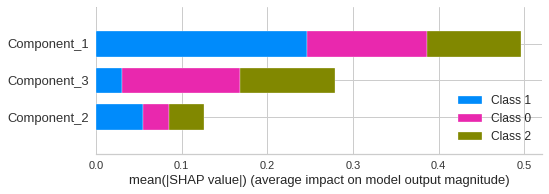

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [74]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [75]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [76]:
interpret_model(tuned_rf_pca, plot='reason')